In [4]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [5]:
with open('dataset/data.txt', 'r') as file:
    data = file.readlines()

data = [line.strip().split(';') for line in data]

df = pd.DataFrame(data, columns=['text', 'emotion'])

print(df.head())

                                                text  emotion
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i left with my bouquet of red and yellow tulip...      joy
4    i was feeling a little vain when i did this one  sadness


In [6]:
df["emotion"].unique()

array(['sadness', 'joy', 'fear', 'anger', 'love', 'surprise', None],
      dtype=object)

In [7]:
df['emotion'].isna().sum()

1

In [8]:
df= df.dropna()

In [9]:
df["emotion"].unique()

array(['sadness', 'joy', 'fear', 'anger', 'love', 'surprise'],
      dtype=object)

In [10]:
emotion_class = {'anger':0, 'sadness':1, 'fear':2, 'surprise':3, 'joy':4, 'love':5}

In [11]:
df['label'] = df['emotion'].map(emotion_class)
df

,text,emotion,label
0,im feeling rather rotten so im not very ambiti...,sadness,1
1,im updating my blog because i feel shitty,sadness,1
2,i never make her separate from me because i do...,sadness,1
3,i left with my bouquet of red and yellow tulip...,joy,4
4,i was feeling a little vain when i did this one,sadness,1
...,...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness,1
19996,i constantly worry about their fight against n...,joy,4
19997,i feel its important to share this info for th...,joy,4
19998,i truly feel that if you are passionate enough...,joy,4


<Axes: xlabel='emotion', ylabel='count'>

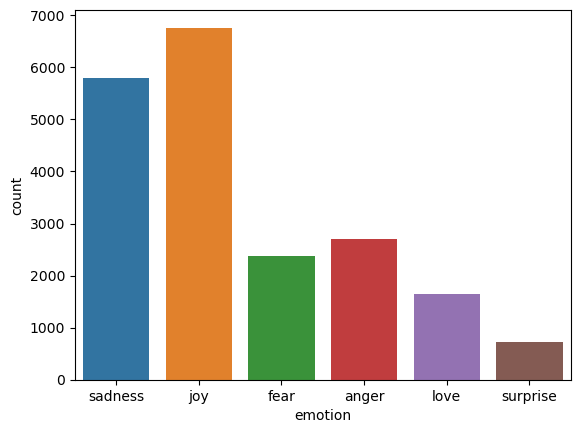

In [12]:
sns.countplot(data=df, x='emotion')

In [13]:
import spacy

nlp = spacy.load("en_core_web_lg") 


def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

2023-03-18 21:01:41.202921: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
df['prepocessed_text']= df['text'].apply(preprocess)

In [15]:
df

,text,emotion,label,prepocessed_text
0,im feeling rather rotten so im not very ambiti...,sadness,1,m feel rotten m ambitious right
1,im updating my blog because i feel shitty,sadness,1,m update blog feel shitty
2,i never make her separate from me because i do...,sadness,1,separate don t want feel like m ashamed
3,i left with my bouquet of red and yellow tulip...,joy,4,leave bouquet red yellow tulip arm feel slight...
4,i was feeling a little vain when i did this one,sadness,1,feel little vain
...,...,...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness,1,m have ssa examination tomorrow morning m prep...
19996,i constantly worry about their fight against n...,joy,4,constantly worry fight nature push limit inner...
19997,i feel its important to share this info for th...,joy,4,feel important share info experience thing
19998,i truly feel that if you are passionate enough...,joy,4,truly feel passionate stay true succeed


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['prepocessed_text'], df['label'], train_size=0.8, random_state=47, stratify=df['label'])

In [17]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(16000,) (16000,)
(4000,) (4000,)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


model1 = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        
     ('Random Forest', RandomForestClassifier())         
])
model1.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('Random Forest', RandomForestClassifier())])

In [19]:
y_pred = model1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       542
           1       0.90      0.90      0.90      1159
           2       0.81      0.86      0.83       475
           3       0.80      0.70      0.75       144
           4       0.85      0.90      0.88      1352
           5       0.79      0.63      0.71       328

    accuracy                           0.86      4000
   macro avg       0.84      0.81      0.82      4000
weighted avg       0.86      0.86      0.86      4000



In [20]:
from sklearn.feature_extraction.text import CountVectorizer
model2 = Pipeline([
    ('vectorizer_tri_grams', CountVectorizer(ngram_range = (1, 3))),          
    ('random_forest', (RandomForestClassifier()))         
])

model2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', CountVectorizer(ngram_range=(1, 3))),
                ('random_forest', RandomForestClassifier())])

In [21]:
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       542
           1       0.88      0.95      0.91      1159
           2       0.89      0.81      0.85       475
           3       0.76      0.81      0.78       144
           4       0.90      0.92      0.91      1352
           5       0.80      0.71      0.75       328

    accuracy                           0.88      4000
   macro avg       0.86      0.84      0.85      4000
weighted avg       0.88      0.88      0.88      4000



In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 464,   45,   14,    0,   14,    5],
       [  13, 1100,   13,    1,   28,    4],
       [  10,   37,  385,   32,   11,    0],
       [   2,    3,   12,  116,   10,    1],
       [  10,   46,    7,    3, 1239,   47],
       [   6,   19,    1,    1,   69,  232]])

In [22]:
import joblib 
joblib.dump(model1, 'model1.pkl')

['model1.pkl']

Text(95.72222222222221, 0.5, 'Truth')

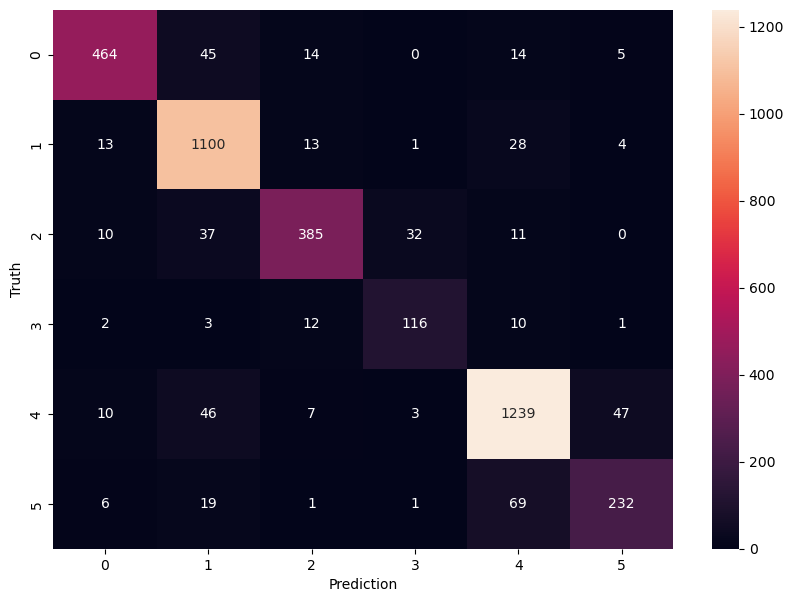

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [23]:
def key_from_value(dictionary, value):
    for key in dictionary:
        if dictionary[key] == value:
            return key

In [50]:
def predict(model, text):
    prepocessed_text = preprocess(text)
    pred_value = model.predict([prepocessed_text])
    pred = key_from_value(emotion_class, pred_value)
    return pred

In [52]:
predict(model1, 'I am happy.')

'joy'